# Análise e Avaliação de Modelos de Regressão

Este notebook demonstra as 4 partes da avaliação de um modelo de regressão, conforme explicado na aula:

1.  **Análise de "Bom Senso"**: Previsões e Coeficientes.
2.  **Análise Visual**: Gráficos de diagnóstico (Regressão, Resíduos, Distribuição).
3.  **Análise Numérica**: Métricas MSE e R-quadrado.
4.  **A "Armadilha" da Comparação**: Comparando um modelo simples com um mais complexo.

## Setup: Importações e Dados Simulados

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configurando o estilo dos gráficos para uma melhor visualização
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

file_name="usedcars.csv"
df = pd.read_csv(file_name, header=0)

print("DataFrame de exemplo criado com sucesso!")
df.columns

DataFrame de exemplo criado com sucesso!


Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

## Parte 1: Análise de "Bom Senso" (Previsões e Coeficientes)

Vamos começar com um modelo simples (Regressão Linear Simples - SLR) que usa apenas `highway_mpg` para prever o `price`.

In [4]:
# Treinando o modelo simples (SLR)
slr_model = LinearRegression()
X_slr = df[['highway-mpg']]
y = df['price']
slr_model.fit(X_slr, y)

print("--- PARTE 1: Análise de 'Bom Senso' (Modelo Simples) ---")

# 1.1 Fazer uma previsão específica
mpg_teste = 30
preco_previsto = slr_model.predict(np.array([[mpg_teste]]))[0]
print(f"Previsão de preço para um carro com {mpg_teste} MPG: ${preco_previsto:,.2f}")
print("   -> O valor parece razoável? Sim, não é negativo nem absurdo.")

# 1.2 Examinar os coeficientes
coeficiente = slr_model.coef_[0]
intercepto = slr_model.intercept_
print(f"\nCoeficiente (inclinação) para 'highway_mpg': {coeficiente:.2f}")
print("   -> Interpretação: Para cada 1 MPG a mais, o preço do carro diminui em ~$738.")
print(f"Intercepto: {intercepto:.2f}")
print("   -> O intercepto é o valor teórico se MPG fosse 0. Muitas vezes não tem um sentido prático.")

--- PARTE 1: Análise de 'Bom Senso' (Modelo Simples) ---
Previsão de preço para um carro com 30 MPG: $13,771.30
   -> O valor parece razoável? Sim, não é negativo nem absurdo.

Coeficiente (inclinação) para 'highway_mpg': -821.73
   -> Interpretação: Para cada 1 MPG a mais, o preço do carro diminui em ~$738.
Intercepto: 38423.31
   -> O intercepto é o valor teórico se MPG fosse 0. Muitas vezes não tem um sentido prático.


c:\Users\junio\develop\repos\studio-ia-python\course\JupyterProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Parte 2: Análise Visual (Diagnóstico com Gráficos)

--- PARTE 2: Análise Visual (gerando gráficos) ---


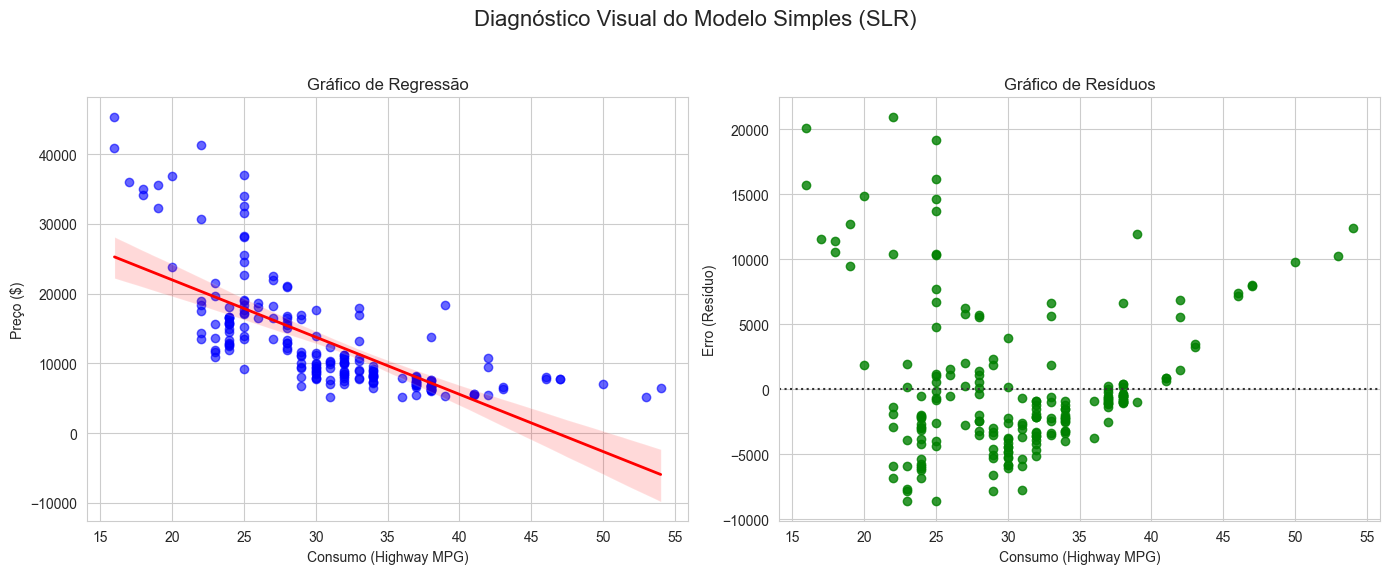

Análise: O Gráfico de Resíduos mostra um padrão claro (não é aleatório), indicando que o modelo linear simples está perdendo alguma informação (neste caso, o efeito do 'engine_size').


In [5]:
print("--- PARTE 2: Análise Visual (gerando gráficos) ---")

# 2.1 Gráfico de Regressão e 2.2 Gráfico de Resíduos (lado a lado)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) # Gráfico 1 de 2
sns.regplot(x='highway-mpg', y='price', data=df,
            scatter_kws={'alpha':0.6, 'color': 'blue'},
            line_kws={'color': 'red', 'linewidth': 2})
plt.title('Gráfico de Regressão')
plt.xlabel('Consumo (Highway MPG)')
plt.ylabel('Preço ($)')

plt.subplot(1, 2, 2) # Gráfico 2 de 2
sns.residplot(x=X_slr.squeeze(), y=y, color='green')
plt.title('Gráfico de Resíduos')
plt.xlabel('Consumo (Highway MPG)')
plt.ylabel('Erro (Resíduo)')

plt.suptitle('Diagnóstico Visual do Modelo Simples (SLR)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("Análise: O Gráfico de Resíduos mostra um padrão claro (não é aleatório), indicando que o modelo linear simples está perdendo alguma informação (neste caso, o efeito do 'engine_size').")

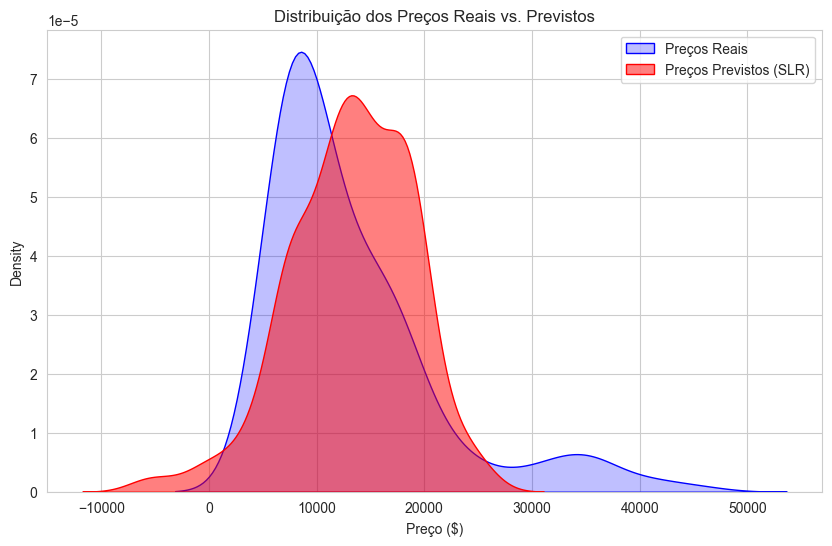

In [6]:
# 2.3 Gráfico de Distribuição
y_pred_slr = slr_model.predict(X_slr)

plt.figure(figsize=(10, 6))
sns.kdeplot(y, color='blue', fill=True, label='Preços Reais')
sns.kdeplot(y_pred_slr, color='red', fill=True, alpha=0.5, label='Preços Previstos (SLR)')
plt.title('Distribuição dos Preços Reais vs. Previstos')
plt.xlabel('Preço ($)')
plt.legend()
plt.show()

## Parte 3: Análise Numérica (MSE e R-quadrado)

In [7]:
print("--- PARTE 3: Análise Numérica (Métricas) ---")

# 3.1 Calcular MSE e R² para o modelo simples (SLR)
mse_slr = mean_squared_error(y, y_pred_slr)
r2_slr = r2_score(y, y_pred_slr)

print(f"Métricas para o Modelo Simples (SLR):")
print(f"  - Erro Quadrático Médio (MSE): {mse_slr:,.2f}")
print(f"  - Raiz do Erro Quadrático Médio (RMSE): ${np.sqrt(mse_slr):,.2f}")
print(f"  - R-quadrado (R²): {r2_slr:.4f}")
print(f"\nInterpretação do R²: O consumo (MPG) sozinho explica aproximadamente {r2_slr:.1%} da variação no preço dos carros.")

--- PARTE 3: Análise Numérica (Métricas) ---
Métricas para o Modelo Simples (SLR):
  - Erro Quadrático Médio (MSE): 31,635,042.94
  - Raiz do Erro Quadrático Médio (RMSE): $5,624.50
  - R-quadrado (R²): 0.4966

Interpretação do R²: O consumo (MPG) sozinho explica aproximadamente 49.7% da variação no preço dos carros.


## Parte 4: A "Armadilha" Final (Comparando Modelos)

Agora vamos treinar um modelo mais complexo (Regressão Linear Múltipla - MLR) usando `highway_mpg` e `engine_size` e comparar as métricas.

In [8]:
print("--- PARTE 4: A 'Armadilha' - Comparando Modelos ---")

# 4.1 Treinar um modelo mais complexo: Regressão Linear Múltipla (MLR)
mlr_model = LinearRegression()
X_mlr = df[['highway-mpg', 'engine-size']]
mlr_model.fit(X_mlr, y)
y_pred_mlr = mlr_model.predict(X_mlr)

# 4.2 Calcular as métricas para o modelo complexo (MLR)
mse_mlr = mean_squared_error(y, y_pred_mlr)
r2_mlr = r2_score(y, y_pred_mlr)

print("\nMétricas para o Modelo Complexo (MLR):")
print(f"  - Erro Quadrático Médio (MSE): {mse_mlr:,.2f}")
print(f"  - Raiz do Erro Quadrático Médio (RMSE): ${np.sqrt(mse_mlr):,.2f}")
print(f"  - R-quadrado (R²): {r2_mlr:.4f}")

# 4.3 A conclusão da aula
print("\n--- Conclusão da Aula (A Armadilha) ---")
print(f"Comparação SLR vs MLR:")
print(f"  - MSE: {mse_slr:,.2f} (Simples) -> {mse_mlr:,.2f} (Complexo)")
print(f"  - R²:  {r2_slr:.4f} (Simples) -> {r2_mlr:.4f} (Complexo)")

print("\nAVISO DA AULA: Como esperado, o MSE do modelo MLR é MENOR e o R² é MAIOR.")
print("Isso acontece porque adicionar mais variáveis (mesmo que inúteis) dá ao modelo mais flexibilidade para se 'ajustar' aos dados de treino.")
print("Neste caso, 'engine_size' é uma variável útil, então a melhora é real. Mas isso nem sempre é verdade.")
print("É por isso que precisamos de técnicas mais avançadas (como R² ajustado e Validação Cruzada) para saber se um modelo mais complexo é *realmente* melhor.")

--- PARTE 4: A 'Armadilha' - Comparando Modelos ---

Métricas para o Modelo Complexo (MLR):
  - Erro Quadrático Médio (MSE): 13,559,588.81
  - Raiz do Erro Quadrático Médio (RMSE): $3,682.33
  - R-quadrado (R²): 0.7842

--- Conclusão da Aula (A Armadilha) ---
Comparação SLR vs MLR:
  - MSE: 31,635,042.94 (Simples) -> 13,559,588.81 (Complexo)
  - R²:  0.4966 (Simples) -> 0.7842 (Complexo)

AVISO DA AULA: Como esperado, o MSE do modelo MLR é MENOR e o R² é MAIOR.
Isso acontece porque adicionar mais variáveis (mesmo que inúteis) dá ao modelo mais flexibilidade para se 'ajustar' aos dados de treino.
Neste caso, 'engine_size' é uma variável útil, então a melhora é real. Mas isso nem sempre é verdade.
É por isso que precisamos de técnicas mais avançadas (como R² ajustado e Validação Cruzada) para saber se um modelo mais complexo é *realmente* melhor.
